In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('e_jet')
    scalar.append('phi_jet')
    scalar.append('pt_electron')
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [14]:
files = ["$HOME/EIC/output/102.root"]
df = getData(files)


Processed $HOME/EIC/output/102.root in 43.8 seconds


In [15]:
d = applyCut(df, '0.1 < y < 0.85', 'y')
d = applyCut(d, 'W2 > 4', 'W2')
d = applyCut(d, 'pt_electron > 4', 'pt_electron')

y 6783540  fraction kept: 18.7
W2 6783540  fraction kept: 100.0
pt_electron 802917  fraction kept: 11.8


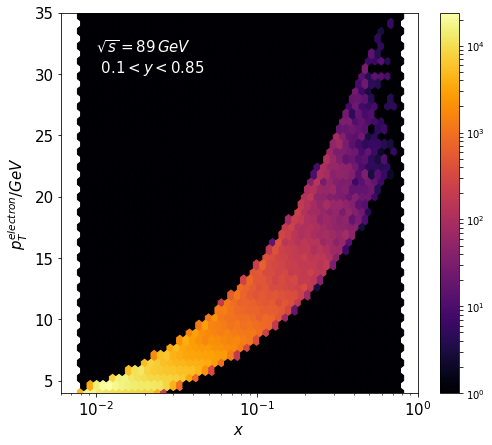

In [16]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'x', 'pt_electron', '$x$', '$ p_T^{electron} / GeV $')
plt.xlim(left=6e-3,right=1)
plt.ylim(bottom=4, top=35)
plt.text(0.01,30,'$\sqrt{s}=89 \, GeV$ \n $0.1 < y < 0.85$', fontsize=15, color='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/pt_electron_vs_x_y.pdf', bbox_inches='tight')

In [7]:
d.eval('Q = sqrt(Q2)', inplace=True)

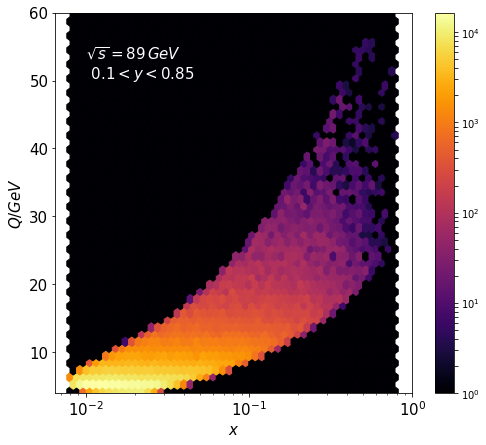

In [27]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'x', 'Q', '$x$', '$ Q / GeV $')
plt.xlim(left=6.5e-3,right=1)
plt.ylim(bottom=4, top=60)
plt.text(0.01,50,'$\sqrt{s}=89 \, GeV$ \n $0.1 < y < 0.85$', fontsize=15, color='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/Q_vs_x.pdf', bbox_inches='tight')

In [3]:
files = ["$HOME/EIC/output/111.root"]
df = getData(files)


Processed $HOME/EIC/output/111.root in 31.4 seconds


In [4]:
d = applyCut(df, '0.1 < y < 0.85', 'y')
d = applyCut(d, 'W2 > 4', 'W2')
d = applyCut(d, 'pt_electron > 4', 'pt_electron')

y 6463835  fraction kept: 21.5
W2 6463835  fraction kept: 100.0
pt_electron 653171  fraction kept: 10.1


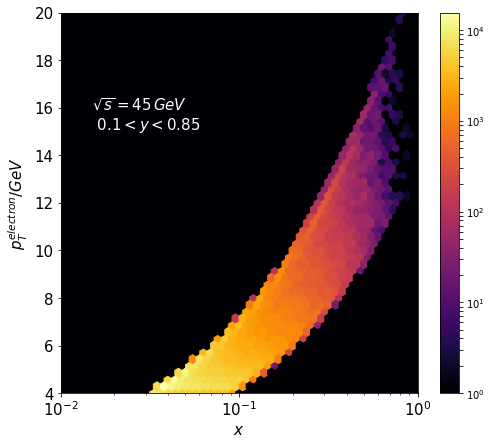

In [6]:
fig = plt.figure(figsize=(8,7))
plot2d(d, 'x', 'pt_electron', '$x$', '$ p_T^{electron} / GeV $',lim=(-2,0,4,20))
plt.xlim(left=0.01,right=1)
plt.ylim(bottom=4, top=20)
plt.text(0.015,15,'$\sqrt{s}=45 \, GeV$ \n $0.1 < y < 0.85$', fontsize=15, color='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/pt_electron_vs_x_y_low.pdf', bbox_inches='tight')